<font face="B Mitra" size=4>
<div dir=rtl align=center>

<br>
<img src="https://aut.ac.ir/templates/tmpl_modern01/images/logo_fa.png" alt="Amirkabir University Logo" width="100">

<br>
<font size=2>
<b>دانشگاه صنعتی امیرکبیر - دانشکده ریاضی و علوم کامپیوتر</b>
</font>

<br>
<font size=6>
<b>مقدمه‌ای بر پردازش تصویر</b>
</font>

<br>
<hr/>
<font size=6>
<b>کارگاه چهارم </b>
</font>

<br>
استاد: دکتر مصطفی شمسی

<br>
طراح:‌ ثمین اسدی

<hr>
</div>
</font>



<font face="B Mitra" size=5>
<div dir=rtl>
کتابخانه های پیشنهادی:
<hr>

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import turtle
from google.colab.patches import cv2_imshow
import requests # For reading image from URL

In [38]:
def read_image_from_url(url):
    # Fetch the content from the url
    response = requests.get(url)
    # Check if the request was successful
    response.raise_for_status()
    # Convert the response content to a numpy array and then to a OpenCV BGR image
    image = cv2.imdecode(np.asarray(bytearray(response.content), dtype="uint8"), cv2.IMREAD_COLOR)
    return image

<font face="B Mitra" size=5>
<div dir=rtl>

<br>
<p align="justify">
<font size=6>
<h2>Region Grwoing</h2>
<font size=4>
</font>
<p>
region growing یک روش تقسیم بندی بسیار محبوب است. از مراحل زیر تشکیل شده است:

(1)
انتخاب یک دانه، یعنی یک پیکسل اولیه. این مرحله به دو صورت قابل انجام است:

   - به صورت تعاملی (کاربر دانه را انتخاب می کند)

     
    

   -  به طور خودکار: دانه به طور تصادفی انتخاب می شود

(2) یک معیار شباهت بین دو پیکسل انتخاب کنید.

    
(3) پیکسل‌های مشابه همسایه‌اش را جمع کنید، و در نتیجه اولین ناحیه R1 ایجاد می‌شود.

    
(4)  یک معیار شباهت بین یک پیکسل و یک منطقه انتخاب کنید.

   
(5)  پیکسل‌های مشابه همسایه‌اش (یعنی متعلق به مرز خارجی آن) را در R1 جمع کنید، که منجر به ایجاد یک منطقه R2⊃R1 می‌شود.

   
(6) این فرآیند را تا زمانی ادامه دهید که پیکسل های بیشتری نتوانند جمع شوند.

   
</p>
<hr>

<hr>
<font face="B Mitra" size=5>
<div dir=rtl>

<font size=6>
<b>تمرین اول</b>
</font>

<br>
<p align="justify">
<font size=4>
<p>  در این تمرین قصد داریم عملیات بخش بندی تصویر را با استفاده از region growing (که پیش‌تر توضیح داده شد) پیاده سازی کنیم. بدین منظور قصد داریم ماده سفید مغز و ماده خاکستری مغز را از پس زمینه جدا کنیم        </p>

</p>

<p>
<font size=4>

</font>
</p>

</div>
</font>

<font face="B Mitra" size=5>
<div dir=rtl>

<br>
<p align="justify">
<font size=4>

<font size=4>
</font>
<p>
1.1 تصویر Color_MRI.png را بخوانید(در فایل زیپ) و به طیف خاکستری ببرید.
</p>



<font size=4>

<p>
۲.۱ دو نقطه به عنوان دانه، یکی در قسمت ماده سفید مغز و دیگری در قسمت ماده خاکستری مغز انتخاب کنید. یک تصویر خالی با ابعاد تصویر خاکستری خوانده شده تعریف کنید و نقاط دانه را روی آن با مقادیر مختلف مشخص کنید.
</p>
</font>


<font size=4>

<p>
۳.۱ تابع region growing را به گونه ای تعریف کنید که دو تا از ورودی هایش " مقدار اختلاف از سطح آستانه " و دیگری رشته ای  که نشان دهنده  
" نوع محاسبه سطح آستانه " باشد. برای نوع محاسبه سطح آستانه  یکی از دو مدل زیر انتخاب کنید.

الف)ثابت: سطح آستانه در تمام تکرا رها یکسان و برابر مقدار شدت در نقطه دانه  میباشد.


ب) متغیر: سطح آستانه در هر تکرار مجددا محاسبه می شود که برابر است با میانگین شدتهای تمام نقاط
درون بخش
</p>


<font size=4>

<p>
  ۴.۱ با کرنل + الگوریتم region growing را روی تصویر خالی اعمال کنید.
تابع region growing را با نوع سطح آستانه ای که انتخاب کردید، به تعدادی روی تصویر اعمال کنید تا پیکسلهای هر بخش را بخش بندی کند.
</p>


<font size=4>
<p>





<p font="Mitra">
</p>
۵.۱ تعداد دفعات تکرار را محاسبه و چاپ کنید. تصویر اصلی و تصویر بخشبندی شده را به صورت استاندارد نمایش دهید و تحلیل کنید.
</p>
</b>

</div>
</font>


<hr>

</div>
</font>

<font face="B Mitra" size=4>
<div dir=rtl>
<p>
<h2> روند حل مسئله </h2>

در ابتدا دو نقطه را به صورت چشمی یکی از ناحیه سفید و دیگری از ناحیه خاکستری به عنوان دانه انتخاب کنید.

برای نمایش این دو نقطه بدلیل اینکه بسیار ریز هستند باید با کمک تابع cv.circle دایره ای اطراف آنها با شدت برابر با همان نقاط نمایش دهید.

نمونه کدی برای تعریف تابع region growing  در زیر آمده است که میتوانید از آن استفاده کنید.

کافی است برای دستیابی به خروجی تابع region growing را فراخوانی کرده و ورودی های مناسب به آن بدهید و در نهایت خروجی های مورد نظر را نمایش دهید و مقادیر step برای هرکدام از ناحیه سفید و ناحیه خاکستری را چاپ کنید.
</div>
</font>

<font face="B Mitra" size=4>
<div dir=rtl>
<p>
<b>
<h2> توضیح عملکرد تابع (سلول پایین)</h2>
</b>
ابعاد تصویر با استفاده از img.shape استخراج شده و در متغیرهای ارتفاع و وزن ذخیره می شود.

آرایه ای به نام seedMark با همان سایز تصویر ورودی ایجاد می شود و با صفر پر می شود. این آرایه برای علامت گذاری پیکسل های متعلق به منطقه تقسیم شده استفاده می شود.

یک لیست خالی به نام seedList برای ذخیره نقاط بذر برای منطقه در حال رشد مقداردهی اولیه می شود.

یک لیست خالی به نام seedList برای ذخیره نقاط seed برای منطقه در حال رشد مقداردهی اولیه می شود.
متغیرها seeds_grayscale، steps, main_grayscale، و seeds_avg_grayscale به مقادیر مناسب، مشابه توضیحات قبلی مقداردهی اولیه می شوند.

یک حلقه برای تکرار روی هر نقطه در لیست دانه ها استفاده می شود. نقاط دانه به seedList اضافه می شوند و مقادیر خاکستری مربوطه از تصویر ورودی به لیست seeds_grayscale اضافه می شوند.

میانگین مقدار خاکستری نقاط بذر با استفاده از np.average(seeds_greyscale) و inseeds_avg_grayscale ذخیره شده محاسبه می شود.

لیست connect  با مختصات نسبی تعریف شده است که نشان دهنده پیکسل های همسایه (بالا، راست، پایین، چپ) مورد استفاده برای اتصال در فرآیند رشد منطقه است.

از حلقه while برای تکرار استفاده می شود تا زمانی که هیچ seed ای در seedList باقی نماند. این حلقه هر seed را پردازش می کند. در داخل حلقه، اولین Seed Point از seedList با استفاده از seedList.pop(0) حذف شده و در currentPoint ذخیره می شود.

اگر diffType "میانگین" باشد، مقدار مقیاس خاکستری فعلی Point از img استخراج می شود و به seeds_grayscale اضافه می شود. سپس، مقدار متوسط ​​مقیاس خاکستری با استفاده از np.average (seeds_grayscale) مجدداً محاسبه می‌شود و در seeds_avg_grayscale ذخیره می‌شود. در نهایت، به پیکسل مربوطه در seedMark مقدار برچسب اختصاص داده می شود تا آن را به عنوان بخشی از منطقه تقسیم شده علامت گذاری کند.

اگر diffType "ثابت" باشد، میانگین مقیاس خاکستری با استفاده از main_grayscale (متوسط ​​محاسبه شده قبلی) محاسبه می شود و در seeds_avg_grayscale ذخیره می شود. به پیکسل مربوطه در seedMark مقدار برچسب اختصاص داده می شود.

حلقه for برای تکرار بر روی چهار مختصات همسایه (بالا، راست، پایین، چپ) تعریف شده در لیست اتصالات استفاده می شود.

در داخل حلقه for، متغیرهای موقت tmpX و tmpY با اضافه کردن مختصات همسایه فعلی به currentPoint محاسبه می‌شوند.

اگر مختصات موقت tmpX یا tmpY خارج از مرزهای تصویر باشند، حلقه به تکرار بعدی ادامه میدهد.

تفاوت مطلق بین مقدار مقیاس خاکستری پیکسل موقت در img و seeds_avg_grayscale محاسبه و در grayDiff ذخیره می شود.

اگر grayDiff کوچکتر از  آستانه باشد و پیکسل مربوطه در seedMark قبلاً برچسب گذاری نشده باشد (seedMark[tmpX,tmpY] == 0)، به پیکسل موقت مقدار برچسب در seedMark اختصاص داده می شود. علاوه بر این، پیکسل موقت برای رشد بیشتر منطقه به seedList اضافه می شود.

متغیر step برای پیگیری تعداد گام های برداشته شده در روند رشد منطقه افزایش می یابد.



</div>
</font>

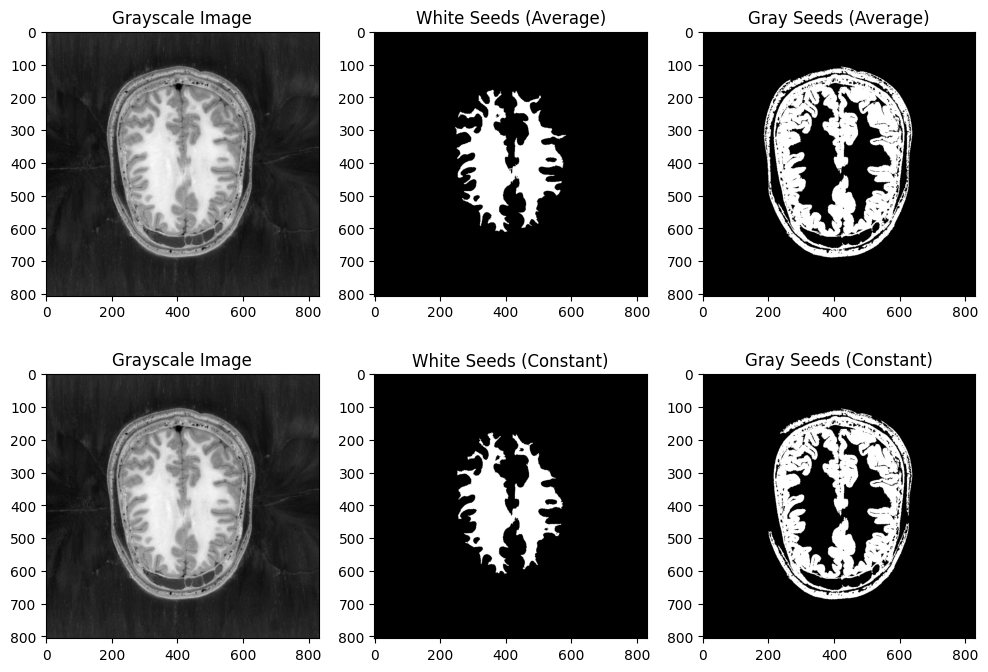

Steps white average:  64212
Steps gray average:  121745
Steps white constant:  59214
Steps gray constant:  114390


In [74]:

def region_growing(img, seeds, thresh, diffType,label):
    height, weight = img.shape
    seedMark = np.zeros(img.shape)
    seedList = []
    steps = 1
    seeds_grayscale = []
    main_grayscale=seeds_grayscale
    seeds_avg_grayscale = 0

    for seed in seeds:
        seedList.append(seed)
        seeds_grayscale.append(img[seed[0], seed[1]])
    seeds_avg_grayscale = np.average(seeds_grayscale)

    connects = [ (0, -1), (1, 0),(0, 1), (-1, 0)]
    while(len(seedList)>0):
        currentPoint = seedList.pop(0)

        if (diffType == "average"):
            seeds_grayscale.append(img[currentPoint[0], currentPoint[1]])
            seeds_avg_grayscale = np.average(seeds_grayscale)
            seedMark[currentPoint[0], currentPoint[1]] = label

        if(diffType=="constant"):
            seeds_avg_grayscale =np.average(main_grayscale)
            seedMark[currentPoint[0], currentPoint[1]] = label

        for i in range(4):
            tmpX = currentPoint[0] + connects[i][0]
            tmpY = currentPoint[1] + connects[i][1]
            if tmpX < 0 or tmpY < 0 or tmpX >= height or tmpY >= weight:
                continue

            grayDiff = abs (img[tmpX, tmpY] - seeds_avg_grayscale)

            if grayDiff < thresh and seedMark[tmpX,tmpY] == 0:
                seedMark[tmpX,tmpY] = label
                seedList.append((tmpX,tmpY))
        steps +=1

    return seedMark, steps


image = cv2.imread('/home/Color_MRI.png')
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

fig, axs = plt.subplots(2, 3, figsize=(10, 7))

whiteSeeds = [(350, 380), (480, 380)]
graySeeds = [(560, 340), (420, 290), (410, 510)]

cv2.circle(image, (350, 380), 5, (0, 0, 255), 2)
cv2.circle(image, (480, 380), 5, (0, 0, 255), 2)
cv2.circle(image, (560, 340), 5, (0, 0, 255), 2)
cv2.circle(image, (420, 290), 5, (0, 0, 255), 2)
cv2.circle(image, (410, 510), 5, (0, 0, 255), 2)

threshold = 30

output_white_average, step_white_average = region_growing(grayscale, whiteSeeds, threshold, "average", 255)

output_gray_average, step_gray_average = region_growing(grayscale, graySeeds, threshold, "average", 120)

output_white_constant, step_white_constant = region_growing(grayscale, whiteSeeds, threshold, "constant", 255)

output_gray_constant, step_gray_constant = region_growing(grayscale, graySeeds, threshold, "constant", 120)

axs[0, 0].imshow(grayscale, cmap='gray')
axs[0, 0].set_title('Grayscale Image')

axs[0, 1].imshow(output_white_average, cmap='gray')
axs[0, 1].set_title('White Seeds (Average)')

axs[0, 2].imshow(output_gray_average, cmap='gray')
axs[0, 2].set_title('Gray Seeds (Average)')

axs[1, 0].imshow(grayscale, cmap='gray')
axs[1, 0].set_title('Grayscale Image')

axs[1, 1].imshow(output_white_constant, cmap='gray')
axs[1, 1].set_title('White Seeds (Constant)')

axs[1, 2].imshow(output_gray_constant, cmap='gray')
axs[1, 2].set_title('Gray Seeds (Constant)')

plt.tight_layout()
plt.show()

#print steps

print("Steps white average: ", step_white_average)
print("Steps gray average: ", step_gray_average)

print("Steps white constant: ", step_white_constant)
print("Steps gray constant: ", step_gray_constant)



<html>
<div dir=rtl>
در اینجا تابع، seedMark و steps  ها را بر می گرداند.

برای نمایش خروجی و تعداد step  ها از آنها استفاده شده است.

تعداد تکرار های average بالاتر بوده و زمان بیشتری می خواهد.
اما طبق خروجی ها به نظر دقت بالاتری نیز نسبت به constant دارد.
</div>
</html>

<hr>
<div dir=rtl>

<h3><font face="B Mitra" size=5><b>خروجی مورد انتظار:</b></font></h3>

<font face="B Mitra" size=4>
خروجی مورد انتظار را می‌توانید در تصویر زیر مشاهده بکنید.
</font>

<img src="https://i.ibb.co/Rz37Mrr/output.png"  width="80%"/>

<div dir=rtl>
<font face="B Mitra" size=6>
لینک‌های مفید
</font>
<ul>
<li><a href="https://sbme-tutorials.github.io/2019/cv/notes/6_week6.html">Region Growing چگونه کار می‌کند</a></li>
</ul>
</div>


<hr>
<font face="B Mitra" size=5>
<div dir=rtl>

<font size=6>
<b>تمرین دوم </b>
</font>

<br>
<p align="justify">
<font size=4>
<p>  در این تمرین قصد داریم سه روش مختلف interpolation یعنی nearest neighborhood , bilinear, bicubic را باهمدیگر مقایسه کنیم.
</p>

<p>
<font size=4>

</font>
</p>

</div>
</font>

<hr>
<font face="B Mitra" size=5>
<div dir=rtl>
کتابخانه های پیشنهادی:


In [62]:
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.9 MB/s eta 0:00:00


In [63]:
# pydicom
from pydicom import dcmread
import cv2

<hr>
<font face="B Mitra" size=5>
<div dir=rtl>

<br>
<p align="justify">
<font size=4>

<font size=4>
</font>
<p>
1.2 از فایل file1.dcm تصویر را بخوانید. (قرار داده شده در فایل زیپ)
</p>



<font size=4>
<p>
۲.2 تعداد بیت های اختصاص داده (برای هر پیکسل)، تعداد بیت های ذخیره شده (برای هر پیکسل) و دسته بندی روش تصویر برداری و بخشی از بدن که از آن تصویر برداری شده است را استخراج و در خروجی چاپ کنید.
</p>
</font>


<font size=4>

<p>
۳.2 با نمونه کاهی (downsample) تعداد پیکسل هارا در جهت محور x به 1/4 و در جهت محور y به 1/2 کاهش دهید.
</p>


<font size=4>

<p>
۴.2 به کمک کتابخانه OpenCv و با روش های نزدیک ترین همسایه، دوخطی و دومکعبی تصویر بخش پیش را به ابعاد اولیه
بازگردانید، نمایش دهید و در مورد تفاوت نتیجه ی هرکدام بحث کنید

</p>


<font size=4>
<p>
<h2>  ۵.2 (سوال امتیازی) </h2>





<p font="Mitra"> تصویر را به فرمت های tif . و bmp . ذخیره کنید
</p>
</p>
</b>

</div>
</font>

<hr>

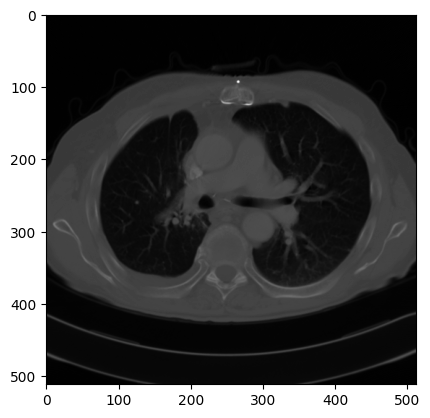

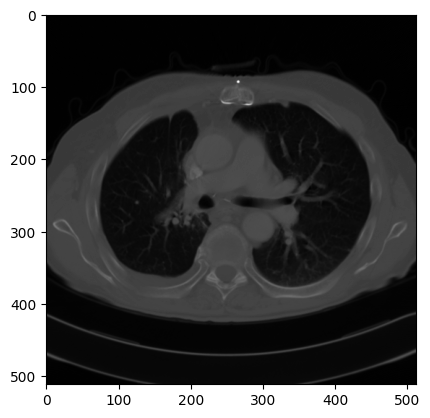

تعداد بیت های اختصاص داده شده برای هر پیکسل:  16
تعداد بیت های ذخیره شده برای هر پیکسل:  12
دسته بندی روش تصویر برداری:  CT
بخش بدن که از آن تصویر برداری شده است:  CHEST


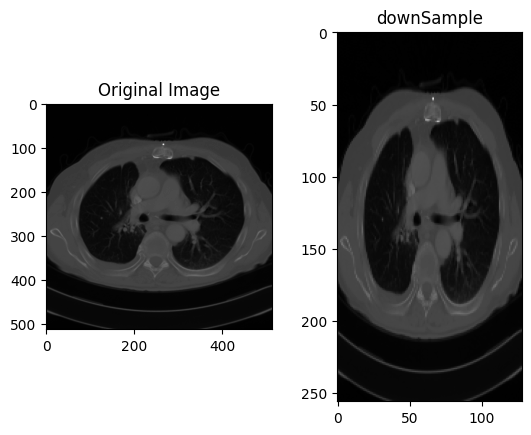

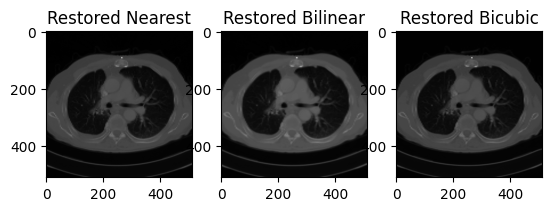

True

In [75]:
#1.2
file_path = '/home/file1.dcm'

dcm_image = dcmread(file_path)

image_data = dcm_image.pixel_array

plt.imshow(image_data, cmap='gray')
plt.show()

#2.2

bits_allocated = dcm_image.BitsAllocated

bits_stored = dcm_image.BitsStored

modality = dcm_image.Modality

body_part = dcm_image.BodyPartExamined

plt.imshow(dcm_image.pixel_array, cmap='gray')
plt.show()

print("تعداد بیت های اختصاص داده شده برای هر پیکسل: ", bits_allocated)
print("تعداد بیت های ذخیره شده برای هر پیکسل: ", bits_stored)
print("دسته بندی روش تصویر برداری: ", modality)
print("بخش بدن که از آن تصویر برداری شده است: ", body_part)

#2.3

resized_image = cv2.resize(image_data, (image_data.shape[1] // 4, image_data.shape[0] // 2))

plt.subplot(1, 2, 1)
plt.imshow(image_data, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(resized_image, cmap='gray')
plt.title('downSample')

plt.show()

#2.4

# بازگرداندن تصویر به ابعاد اولیه با استفاده از نزدیک ترین همسایه
restored_nearest = cv2.resize(resized_image, (image_data.shape[1], image_data.shape[0]), interpolation=cv2.INTER_NEAREST)

# بازگرداندن تصویر به ابعاد اولیه با استفاده از روش دوخطی
restored_bilinear = cv2.resize(resized_image, (image_data.shape[1], image_data.shape[0]), interpolation=cv2.INTER_LINEAR)

# بازگرداندن تصویر به ابعاد اولیه با استفاده از روش دومکعبی
restored_bicubic = cv2.resize(resized_image, (image_data.shape[1], image_data.shape[0]), interpolation=cv2.INTER_CUBIC)

plt.subplot(1, 3, 1)
plt.imshow(restored_nearest, cmap='gray')
plt.title('Restored Nearest')

plt.subplot(1, 3, 2)
plt.imshow(restored_bilinear, cmap='gray')
plt.title('Restored Bilinear')

plt.subplot(1, 3, 3)
plt.imshow(restored_bicubic, cmap='gray')
plt.title('Restored Bicubic')

plt.show()

#2.5

#tif
cv2.imwrite("restored_bilinear.tif", restored_bilinear)
cv2.imwrite("restored_nearest.tif", restored_nearest)
cv2.imwrite("restored_bicubic.tif", restored_bicubic)

#bmp
cv2.imwrite("restored_bilinear.bmp", restored_bilinear)
cv2.imwrite("restored_nearest.bmp", restored_nearest)
cv2.imwrite("restored_bicubic.bmp", restored_bicubic)

<div dir=rtl>

قسمت 2.4

روش نزدیک‌ترین همسایه (Nearest Neighbor):
   - این روش بسیار ساده است و برای هر پیکسل در تصویر کاهش یافته، به طور مستقیم پیکسلی را انتخاب می‌کند که در مکان نزدیکترین همسایه قرار دارد.
   - در این روش، هیچ تغییر در شدت رنگ یا جزئیات تصویر اعمال نمی‌شود و تصویر بازگردانده شده ممکن است به شکل پیکسلی و خشک و خالی از جزئیات به نظر برسد.
   - این روش  سرعت بالایی دارد و مناسب برای تصاویر با ساختار ساده مانند نقشه‌ها و آیکون‌ها می باشد، اما برای تصاویر با جزئیات پیچیده، نتایج مناسبی ندارد.

   روش دوخطی (Bilinear):
   - در این روش، برای هر پیکسل در تصویر کاهش یافته، از میان چهار پیکسل همسایه به شکلی خطی ترکیب می‌شود.
   - این روش تغییرات شدت رنگ را به شکل خطی در نظر می‌گیرد و برخلاف روش نزدیک‌ترین همسایه، جزئیات بیشتری را در تصویر بازگردانده شده حفظ می‌کند.
   - با استفاده از این روش، تصاویر نتایج واقع‌گرایانه ای دارند.

   روش دومکعبی (Bicubic):
   - روش دومکعبی، یک روش پیچیده‌تر است که از روش محاسباتی و تعاملی برای ترکیب پیکسل‌ها استفاده می‌کند.
   - در این روش، برای هر پیکسل در تصویر کاهش یافته، از میان 16 پیکسل همسایه با استفاده از تابع دومکعبی ترکیب می‌شوند.
   - روش دومکعبی نسبت به روش دوخطی دقت بیشتری در بازسازی جزئیات دارد و نتایج با کیفیت‌ترمی‌دهد، اما ممکن است به هزینه‌ی پردازشی بیشتری نیاز داشته باشد.

   به طور کلی، انتخاب روش مناسب برای بازگرداندن تصاویر وابسته به نوع تصویر و نیازهای برنامه است. در صورتی که دقت بالا و حفظ جزئیات در تصویر مهم باشد، روش دومکعبی مناسب است. اگر سرعت پردازش و عدم نیاز به جزئیات دقیق در تصویر بیشتر مورد توجه باشد، روش نزدیک‌ترین همسایه قابل استفاده است. و در صورتی که نیاز به توازن مناسب بین دقت و سرعت باشد، روش دوخطی می‌تواند گزینه مناسبی باشد.


</div>

<font face="B Mitra" size=4>
<div dir=rtl>
<p>
<h2> روند حل مسئله </h2>
ابتدا با کمک کتابخانه معرفی شده فرمت dcm را میخوانیم و اطلاعات آن را بیرون میکشیم. برای مراحل بعدی یعنی نمونه کاهی و درونیابی میتوانید از دستورات آماده کتابخانه cv2 استفاده کنید.

</div>
</font>

<div dir=rtl>
<font face="B Mitra" size=6>
لینک‌های مفید
</font>
<ul>
<li><a href="https://www.kaggle.com/code/micheldc55/how-to-read-dcm-dicom-data">نحوه خواندن فرمت .DCM</a></li>
</ul>
</div>
